<a href="https://colab.research.google.com/github/Sedzay/les4/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання
tables = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",match="Коефіцієнт народжуваності в регіонах України")
print(tables)

[               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13   

In [2]:
#Вивести перші рядки таблиці за допомогою методу head
tables[0].head()


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
tables[0].shape

(28, 9)

In [3]:
#Замініть у таблиці значення "—" на значення NaN
tables[0].replace('—',pd.NA,inplace=True)
tables[0].head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,<NA>,<NA>
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,<NA>


In [4]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes

print(tables[0].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [5]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
table = tables[0]
# Конвертація типів даних до числових значень крім першого стовпця
for column in table.columns[1:]:
    table[column] = pd.to_numeric(table[column], errors='coerce')

print(table.dtypes)



Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [6]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
table = table.drop(table.index[-1])
print(table)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

In [7]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
table.iloc[:, 1:] = round(table.iloc[:, 1:].fillna(table.iloc[:, 1:].mean()),2)
print(table)

               Регіон    1950    1960   1970  1990  2000  2012    2014    2019
0                Крим  230.00  206.00  160.0   130    73   126  111.44   80.17
1           Вінницька  224.00  192.00  142.0   124    84   112  109.00   76.00
2           Волинська  247.00  250.00  179.0   153   112   148  141.00  101.00
3    Дніпропетровська  204.00  204.00  151.0   123    71   112  111.00   71.00
4            Донецька  271.00  214.00  140.0   109    61    98   82.00   80.17
5         Житомирська  261.00  223.00  159.0   129    89   122  120.00   79.00
6        Закарпатська  314.00  273.00  207.0   168   115   151  146.00  104.00
7          Запорізька  219.00  197.00  150.0   124    71   106  106.00   68.00
8   Івано-Франківська  243.00  248.00  182.0   155   103   124  122.00   88.00
9            Київська  204.00  189.00  156.0   123    73   122  121.00   80.00
10     Кіровоградська  216.00  171.00  145.0   126    79   110  108.00   68.00
11          Луганська  262.00  235.00  144.0   116  

In [8]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
#середній по Україні
average_birth_rate_2019 = table['2019'].mean()
print(average_birth_rate_2019)
#Регіони з народжуванністю більше за середній в Україні
regions_above_average = table[table['2019'] > average_birth_rate_2019]
print(regions_above_average)
#складання до списку
regions_list = regions_above_average['Регіон'].tolist()
print(regions_list)

80.17333333333335
               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [9]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_2014 = table.loc[table['2014'].idxmax(), 'Регіон']
print(max_2014)

Рівненська


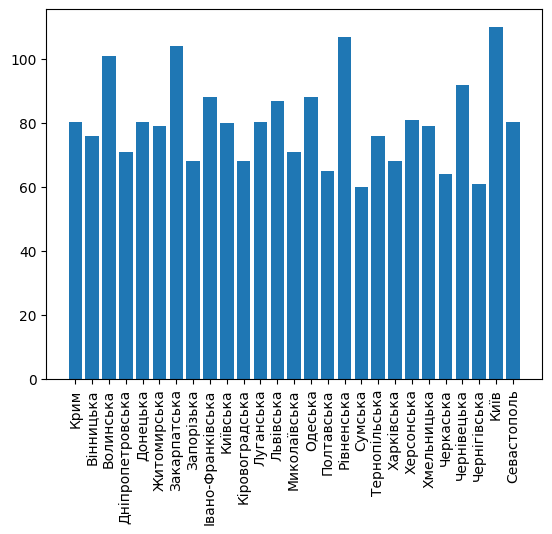

In [11]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

plt.bar(table['Регіон'],table['2019'])
plt.xticks(rotation=90)
plt.show()

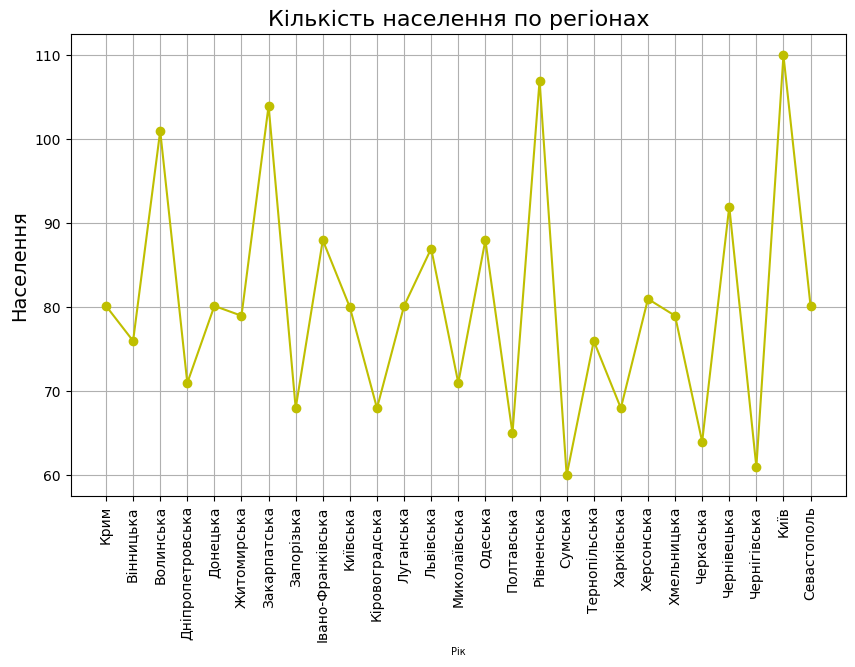

In [15]:
# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(table['Регіон'], table['2019'], marker='o', color='y', linestyle='-')
plt.title(f'Кількість населення по регіонах', fontsize=16)
plt.xlabel('Рік', fontsize=7)
plt.ylabel('Населення', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

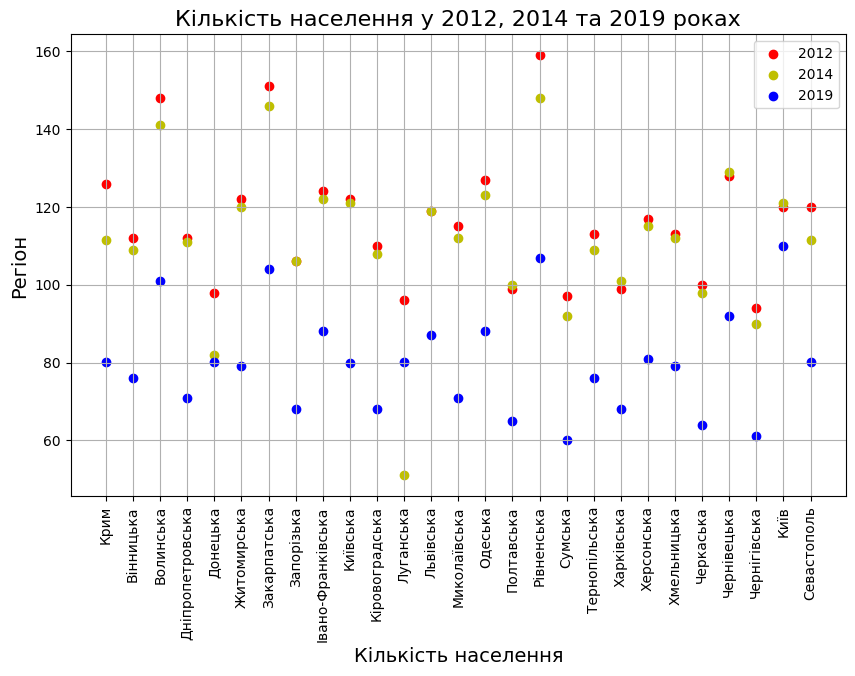

In [24]:
# Побудова графіка розсіювання
plt.figure(figsize=(10, 6))
plt.scatter(table['Регіон'], table['2012'], color='r', marker='o', label='2012')
plt.scatter(table['Регіон'], table['2014'], color='y', marker='o', label='2014')
plt.scatter(table['Регіон'], table['2019'], color='b', marker='o', label='2019')
plt.title('Кількість населення у 2012, 2014 та 2019 роках', fontsize=16)
plt.xlabel('Кількість населення', fontsize=14)
plt.ylabel('Регіон', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

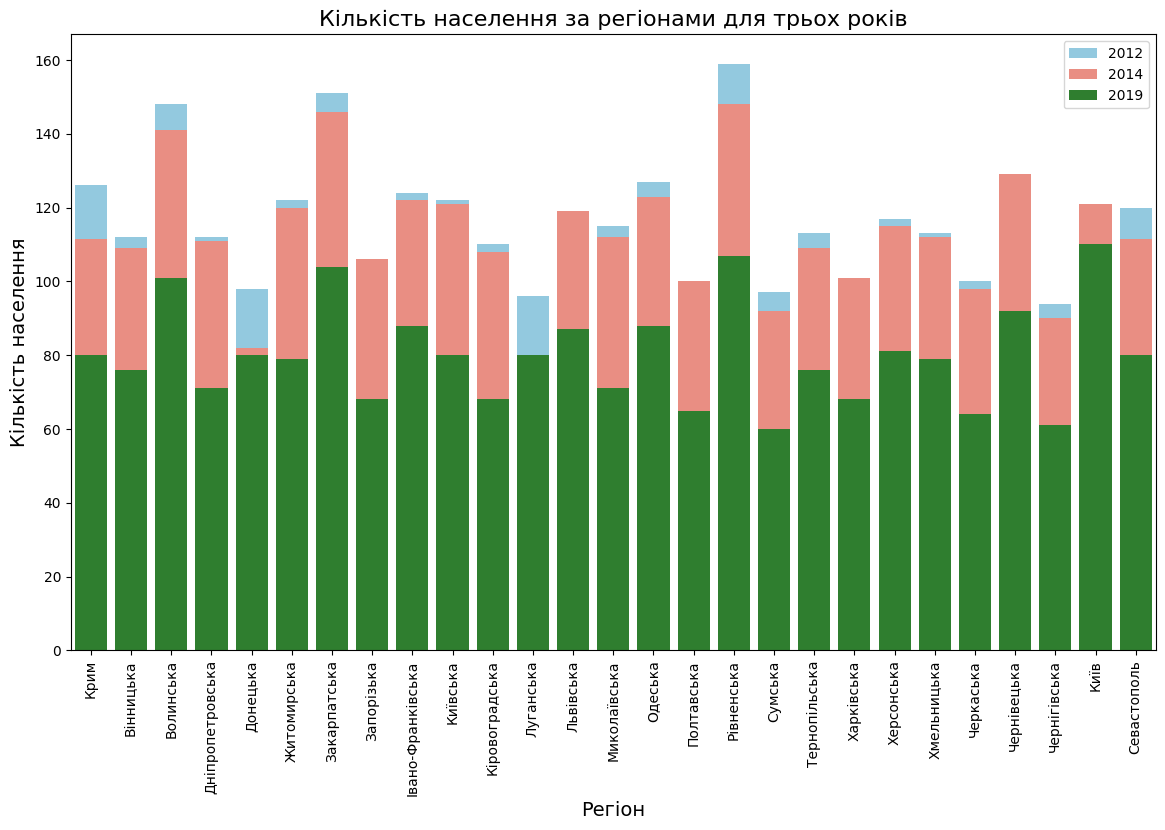

In [31]:
import seaborn as sns

# Побудова гістограми кількості населення за регіонами для трьох років
plt.figure(figsize=(14, 8))
sns.barplot(data=table, x='Регіон', y='2012', color='skyblue', label='2012')
sns.barplot(data=table, x='Регіон', y='2014', color='salmon', label='2014')
sns.barplot(data=table, x='Регіон', y='2019', color='forestgreen', label='2019')

plt.title('Кількість населення за регіонами для трьох років', fontsize=16)
plt.xlabel('Регіон', fontsize=14)
plt.ylabel('Кількість населення', fontsize=14)
plt.xticks(rotation=90)
plt.legend()

plt.show()